In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16

In [2]:
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [4]:
from glob import glob
trn='D:/Penn_Action/*/'
tr= glob(trn)

len(tr)



15

In [6]:
x = glob(tr[0]+'/*/')
x

['E:/Penn_Action\\baseball_pitch\\0001\\',
 'E:/Penn_Action\\baseball_pitch\\0002\\',
 'E:/Penn_Action\\baseball_pitch\\0003\\',
 'E:/Penn_Action\\baseball_pitch\\0004\\',
 'E:/Penn_Action\\baseball_pitch\\0005\\',
 'E:/Penn_Action\\baseball_pitch\\0006\\',
 'E:/Penn_Action\\baseball_pitch\\0007\\',
 'E:/Penn_Action\\baseball_pitch\\0008\\',
 'E:/Penn_Action\\baseball_pitch\\0009\\',
 'E:/Penn_Action\\baseball_pitch\\0010\\',
 'E:/Penn_Action\\baseball_pitch\\0011\\',
 'E:/Penn_Action\\baseball_pitch\\0012\\',
 'E:/Penn_Action\\baseball_pitch\\0013\\',
 'E:/Penn_Action\\baseball_pitch\\0014\\',
 'E:/Penn_Action\\baseball_pitch\\0015\\',
 'E:/Penn_Action\\baseball_pitch\\0016\\',
 'E:/Penn_Action\\baseball_pitch\\0017\\',
 'E:/Penn_Action\\baseball_pitch\\0018\\',
 'E:/Penn_Action\\baseball_pitch\\0019\\',
 'E:/Penn_Action\\baseball_pitch\\0020\\',
 'E:/Penn_Action\\baseball_pitch\\0021\\',
 'E:/Penn_Action\\baseball_pitch\\0022\\',
 'E:/Penn_Action\\baseball_pitch\\0023\\',
 'E:/Penn_A

In [5]:
train = []
val = []
test = []
train_y = []
val_y = []
test_y = []

y = 0
for i in tr:
    
    #print(i)
    x = glob(i+'/*/')
    
    #shuffle(x)
    t,v = train_test_split( x , test_size=0.2, random_state=42)
    vv, tt = train_test_split( v , test_size=0.5, random_state=42)
    
    for j in t:
        
        mm = len(glob(j+'/*'))
        
        if(mm<10):
            continue
        
        train.append(j)
        train_y.append(y)
    
    for j in vv:
        
        mm = len(glob(j+'/*'))
        
        if(mm<10):
            continue
            
        val.append(j)
        val_y.append(y)
        
    for j in tt:
        
        mm = len(glob(j+'/*'))
        
        if(mm<10):
            continue
            
        test.append(j)
        test_y.append(y)
        
    y = y+1

from tensorflow.keras.utils import to_categorical
tra_y =  np.array(to_categorical(train_y))
va_y  =  np.array(to_categorical(val_y))
te_y  =  np.array(to_categorical(test_y))

In [6]:
(train, tra_y) = shuffle(train, tra_y)
(val, va_y) = shuffle(val, va_y)
(test, te_y) = shuffle(test, te_y)

In [7]:
len(val)

233

In [19]:
y = glob(val[5]+'/*')
y

['E:/Penn_Action\\baseball_pitch\\0010\\000001.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000002.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000003.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000004.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000005.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000006.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000007.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000008.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000009.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000010.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000011.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000012.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000013.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000014.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000015.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000016.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000017.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000018.jpg',
 'E:/Penn_Action\\baseball_pitch\\0010\\000019

In [34]:

def get_te(k , a) :
    x = glob(k+'/*')
    imgdata=[]
    higher = len(x)
    import more_itertools as mit
    
    y = mit.random_combination(range(0, higher), r=15)

    for i in y:
        
        a = Image.open(x[i])
        b = a.resize((50, 50))
        c = np.array(b)
        imgdata.append(c.reshape(50,50,3))
        
    idata = np.array(imgdata)
    X_train = idata
    X_train = X_train.astype('float32') / 255.
    #print(np.shape(X_train))
    return X_train

def get_cat(k) :
    return np.array(k)

In [52]:
from keras.preprocessing.image import ImageDataGenerator
def get_tex(k , a) :
    x = glob(k+'/*')
    imgdata=[]
    higher = len(x)
    import more_itertools as mit
    
    y = mit.random_combination(range(0, higher), r=15)

    for i in y:
        
        a = Image.open(x[i])
        b = a.resize((50, 50))
        c = np.array(b)
        imgdata.append(c.reshape(50,50,3))
        
    y = mit.random_combination(range(0, 2), r=1)
    
    if (y == 0):
        gen = ImageDataGenerator()
        imgdat = []    
        for i in range(0,len(imgdata)):
            imgdat.append ( gen.apply_transform(imgdata[i], {'ty':100, 'theta':10}) )
            
    imgdat = imgdata
    idata = np.array(imgdat)
    X_train = idata
    X_train = X_train.astype('float32') / 255.
    #print(np.shape(X_train))
    return X_train

def get_cat(k) :
    return np.array(k)

In [54]:
class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, filename , labels, batch_size) :
    self.filename = filename
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    y_train = get_cat(batch_y)
    i=0
    return np.array([get_tex(i,self.filename)for i in batch_x]), np.array( y_train )

In [55]:
class My_Test_Generator(keras.utils.Sequence) :
  
  def __init__(self, filename , batch_size) :
    self.filename = filename
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
    i=0
    return np.array([get_te(i,self.filename)for i in batch_x])

In [59]:
batch_size = 32

my_training_batch_generator = My_Custom_Generator(train, tra_y, batch_size)
my_validation_batch_generator = My_Custom_Generator(val, va_y, batch_size)

In [61]:
#x = My_Test_Generator(test, batch_size).__getitem__(7)
arr = np.array(My_Test_Generator(test, batch_size).__getitem__(0))
for i in range(1,(len(x))):
    x = My_Test_Generator(test, batch_size).__getitem__(i)
    arr = np.concatenate((arr,x),axis=0)

In [12]:
import more_itertools as mit
y = mit.random_combination(range(1000, 10000), r=10)
y

(2727, 5893, 6243, 6705, 6836, 7698, 9264, 9331, 9652, 9751)

In [47]:
x = My_Test_Generator(test, batch_size)

In [58]:
np.shape(arr)

(64, 15, 50, 50, 3)

(32, 10, 60, 60, 3)

(3499, 6, 28, 28, 3)

In [11]:
DATASET_NAME = "organmnist3d"
BATCH_SIZE = 32
AUTO = tf.data.AUTOTUNE
INPUT_SHAPE = ( 6, 28, 28, 3 )
NUM_CLASSES = 2

# OPTIMIZER
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 1e-5

# TRAINING
EPOCHS = 60

# TUBELET EMBEDDING
PATCH_SIZE = (4, 8, 8)
NUM_PATCHES = (INPUT_SHAPE[0] // PATCH_SIZE[0]) ** 2

# ViViT ARCHITECTURE
LAYER_NORM_EPS = 1e-6
PROJECTION_DIM = 128
NUM_HEADS = 2
NUM_LAYERS = 2

In [169]:
np.shape(new_y)

(6123, 2)

In [13]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [156]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
from keras_self_attention import SeqSelfAttention

inputs = layers.Input(shape= (6,28,28,3) )

x = (TimeDistributed( Flatten() )) (inputs)
y = TimeDistributed(layers.Dense(units=256, activation="tanh")) (x)

z = LSTM(128,return_sequences=True,dropout=0.1) (y)

encoded_patches = (PatchEncoder(6, 128 )) (z)

for _ in range(2):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output = layers.MultiHeadAttention (  num_heads=2, key_dim=128, dropout=0.1 )  (x1, x1)

        
    x2 = layers.Add()([attention_output, encoded_patches])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(LSTM(128,return_sequences=False,dropout=0.2) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = LSTM(100,return_sequences=False,dropout=0.2)(representation)

outputs = layers.Dense(units=2, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
#model.summary()

In [23]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

In [62]:
#Patch Encoder with Conv2D ,  LSTM , Pos_Emd

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection =keras.Sequential(
            [
                (layers.Conv2D(8, (3, 3), strides=(1,1),activation='relu')),
                TimeDistributed(MaxPooling2D(2,2)),
                (layers.Conv2D(16, (3, 3), strides=(1,1),activation='relu')),
                TimeDistributed(MaxPooling2D(2,2)),
                (layers.Conv2D(32, (3, 3), strides=(1,1),activation='relu')),
                TimeDistributed(MaxPooling2D(2,2)),
                TimeDistributed(Flatten()),
                layers.Dense(projection_dim),
            ]) 
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded 

In [63]:
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
from keras_self_attention import SeqSelfAttention

inputs = layers.Input(shape= (15,50,50,3) )

encoded_patches = (PatchEncoder(15, 32 )) (inputs)

for _ in range(2):
    
    x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

    attention_output = layers.MultiHeadAttention (  num_heads=2, key_dim=32, dropout=0.2 )  (x1, x1)
    
    lstm_output =  LSTM(32,return_sequences=True,dropout=0.2)(x1)

    x2 = layers.Add()([attention_output, encoded_patches,lstm_output])

        # Layer Normalization and MLP
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)


    x3 = keras.Sequential(layers.Dense(units=32, activation=tf.nn.gelu) )(x3)

        # Skip connection
    encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)

representation = layers.GlobalAvgPool1D()(representation)

#representation = LSTM(100,return_sequences=False,dropout=0.1)(representation)

outputs = layers.Dense(units=15, activation="softmax") ( representation)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 15, 50, 50,  0                                            
__________________________________________________________________________________________________
patch_encoder (PatchEncoder)    (None, 15, 32)       22928       input_7[0][0]                    
__________________________________________________________________________________________________
layer_normalization (LayerNorma (None, 15, 32)       64          patch_encoder[0][0]              
__________________________________________________________________________________________________
multi_head_attention (MultiHead (None, 15, 32)       8416        layer_normalization[0][0]        
                                                                 layer_normalization[0][0]    

In [67]:
initial_learning_rate = 0.0000001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.9,
    staircase=True)
optimizer = keras.optimizers.Adam(lr_schedule)

In [69]:
#model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics='accuracy')
model.fit_generator(generator=my_training_batch_generator, epochs = 2,validation_data = my_validation_batch_generator)

C:\Users\chsha\AppData\Local\Temp/ipykernel_15552/3135080164.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)


Epoch 1/2
58/58 [==============================] - 525s 9s/step - loss: 0.2004 - accuracy: 0.9326 - val_loss: 4.9774 - val_accuracy: 0.3906
Epoch 2/2
58/58 [==============================] - 508s 9s/step - loss: 0.1316 - accuracy: 0.9542 - val_loss: 4.7092 - val_accuracy: 0.3991


In [20]:
predictions = model.predict_generator(My_Test_Generator(test, batch_size), verbose=0)

C:\Users\chsha\anaconda3\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
C:\Users\chsha\AppData\Local\Temp/ipykernel_2348/1543328956.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)


In [24]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
p = np.argmax(predictions, axis=1)


In [27]:
lossAndMetrics = model.evaluate(arr[:200], te_y[:])
lossAndMetrics

ValueError: Data cardinality is ambiguous:
  x sizes: 32
  y sizes: 200
Make sure all arrays contain the same number of samples.

In [26]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test, p)
score

C:\Users\chsha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:217: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


0.0

[5.160373687744141, 0.36000001430511475]

In [76]:
te_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [85]:
X_train, X_val, y_train, y_val = train_test_split( train_df,YY_Train , test_size=0.2, random_state=42)

In [86]:

@tf.function
def preprocess(frames: tf.Tensor, label: tf.Tensor):
    """Preprocess the frames tensors and parse the labels."""
    # Preprocess images
    frames = tf.image.convert_image_dtype(
        frames[
            ..., tf.newaxis
        ],  # The new axis is to help for further processing with Conv3D layers
        tf.float32,
    )
    # Parse label
    label = tf.cast(label, tf.float32)
    return frames, label


def prepare_dataloader(
    videos: np.ndarray,
    labels: np.ndarray,
    loader_type: str = "train",
    batch_size: int = BATCH_SIZE,
):
    """Utility function to prepare the dataloader."""
    dataset = tf.data.Dataset.from_tensor_slices((videos, labels))

    if loader_type == "train":
        dataset = dataset.shuffle(BATCH_SIZE * 2)

    dataloader = (
        dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
        .batch(batch_size)
        .prefetch(tf.data.AUTOTUNE)
    )
    return dataloader


trainloader = prepare_dataloader(X_train , y_train , "train")
validloader = prepare_dataloader(X_val, y_val, "valid")
testloader = prepare_dataloader(test_df,YY_Test, "test")

In [66]:

class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=patch_size,
            padding="VALID",
        )
        self.flatten = layers.Reshape(target_shape=(-1, embed_dim))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches


In [67]:

class PositionalEncoder(layers.Layer):
    def __init__(self, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim

    def build(self, input_shape):
        _, num_tokens, _ = input_shape
        self.position_embedding = layers.Embedding(
            input_dim=num_tokens, output_dim=self.embed_dim
        )
        self.positions = tf.range(start=0, limit=num_tokens, delta=1)

    def call(self, encoded_tokens):
        # Encode the positions and add it to the encoded tokens
        encoded_positions = self.position_embedding(self.positions)
        encoded_tokens = encoded_tokens + encoded_positions
        return encoded_tokens


In [97]:

def create_vivit_classifier(
    tubelet_embedder,
    positional_encoder,
    input_shape=INPUT_SHAPE,
    transformer_layers=NUM_LAYERS,
    num_heads=NUM_HEADS,
    embed_dim=PROJECTION_DIM,
    layer_norm_eps=LAYER_NORM_EPS,
    num_classes=NUM_CLASSES,
):
    # Get the input layer
    inputs = layers.Input(shape=input_shape)
    # Create patches.
    patches = tubelet_embedder(inputs)
    # Encode patches.
    encoded_patches = positional_encoder(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization and MHSA
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim // num_heads, dropout=0.1
        )(x1, x1)

        # Skip connection
        x2 = layers.Add()([attention_output, encoded_patches])

        # Layer Normalization and MLP
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = keras.Sequential(
            [
                layers.Dense(units=embed_dim * 4, activation=tf.nn.gelu),
                layers.Dense(units=embed_dim, activation=tf.nn.gelu),
            ]
        )(x3)

        # Skip connection
        encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
    representation = layers.LayerNormalization(epsilon=layer_norm_eps)(encoded_patches)
    representation = layers.GlobalAvgPool1D()(representation)

    # Classify outputs.
    outputs = layers.Dense(units=num_classes, activation="softmax")(representation)

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


In [99]:


# TUBELET EMBEDDING
PATCH_SIZE = (4, 8, 8)
NUM_PATCHES = (INPUT_SHAPE[0] // PATCH_SIZE[0]) ** 2

NUM_HEADS = 2
NUM_LAYERS = 2
# TRAINING
EPOCHS = 100

md = create_vivit_classifier(
        tubelet_embedder=TubeletEmbedding(
            embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
        ),
        positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
    )

md.summary()

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 6, 28, 28, 3 0                                            
__________________________________________________________________________________________________
tubelet_embedding_11 (TubeletEm (None, 9, 128)       98432       input_20[0][0]                   
__________________________________________________________________________________________________
positional_encoder_11 (Position (None, 9, 128)       1152        tubelet_embedding_11[0][0]       
__________________________________________________________________________________________________
layer_normalization_95 (LayerNo (None, 9, 128)       256         positional_encoder_11[0][0]      
___________________________________________________________________________________________

In [100]:

def run_experiment():
    # Initialize model
    model = create_vivit_classifier(
        tubelet_embedder=TubeletEmbedding(
            embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
        ),
        positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
    )

    # Compile the model with the optimizer, loss function
    # and the metrics.
    optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    # Train the model.
    _ = model.fit(trainloader, epochs=EPOCHS, validation_data=validloader)

    _, accuracy, top_5_accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return model


model = run_experiment()

Epoch 1/100
77/77 [==============================] - 21s 100ms/step - loss: 0.4438 - accuracy: 0.8424 - top-5-accuracy: 1.0000 - val_loss: 0.3894 - val_accuracy: 0.8206 - val_top-5-accuracy: 1.0000
Epoch 2/100
77/77 [==============================] - 6s 73ms/step - loss: 0.3220 - accuracy: 0.8571 - top-5-accuracy: 1.0000 - val_loss: 0.2746 - val_accuracy: 0.8679 - val_top-5-accuracy: 1.0000
Epoch 3/100
77/77 [==============================] - 5s 70ms/step - loss: 0.2685 - accuracy: 0.8812 - top-5-accuracy: 1.0000 - val_loss: 0.2534 - val_accuracy: 0.8874 - val_top-5-accuracy: 1.0000
Epoch 4/100
77/77 [==============================] - 6s 81ms/step - loss: 0.1945 - accuracy: 0.9147 - top-5-accuracy: 1.0000 - val_loss: 0.2213 - val_accuracy: 0.9119 - val_top-5-accuracy: 1.0000
Epoch 5/100
77/77 [==============================] - 6s 84ms/step - loss: 0.1727 - accuracy: 0.9265 - top-5-accuracy: 1.0000 - val_loss: 0.2144 - val_accuracy: 0.9086 - val_top-5-accuracy: 1.0000
Epoch 6/100
77/77 

Epoch 84/100
77/77 [==============================] - 6s 80ms/step - loss: 0.0168 - accuracy: 0.9935 - top-5-accuracy: 1.0000 - val_loss: 0.5888 - val_accuracy: 0.9054 - val_top-5-accuracy: 1.0000
Epoch 85/100
77/77 [==============================] - 7s 96ms/step - loss: 0.0504 - accuracy: 0.9820 - top-5-accuracy: 1.0000 - val_loss: 0.4264 - val_accuracy: 0.9152 - val_top-5-accuracy: 1.0000
Epoch 86/100
77/77 [==============================] - 6s 79ms/step - loss: 0.0142 - accuracy: 0.9967 - top-5-accuracy: 1.0000 - val_loss: 0.3633 - val_accuracy: 0.9250 - val_top-5-accuracy: 1.0000
Epoch 87/100
77/77 [==============================] - 6s 83ms/step - loss: 0.0139 - accuracy: 0.9951 - top-5-accuracy: 1.0000 - val_loss: 0.3800 - val_accuracy: 0.9347 - val_top-5-accuracy: 1.0000
Epoch 88/100
77/77 [==============================] - 6s 78ms/step - loss: 0.0079 - accuracy: 0.9976 - top-5-accuracy: 1.0000 - val_loss: 0.4113 - val_accuracy: 0.9331 - val_top-5-accuracy: 1.0000
Epoch 89/100
77

In [101]:
YY_Test = YY_Test
pred = model.predict(test_df)
p = np.round(pred)

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = YY_Test

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T

array([[1105,   21],
       [   4,  180]], dtype=int64)

In [102]:
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r = 1 - (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)

0.935064935064935

0.9398567119155354

In [94]:
Y_test[0]

array([0., 1.], dtype=float32)

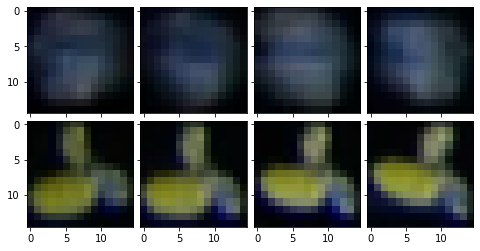

In [59]:
x = train_df[19]
y = train_df[3]
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

im1 = np.arange(100).reshape((10, 10))
im2 = im1.T
im3 = np.flipud(im1)
im4 = np.fliplr(im2)

fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [x[0], x[1], x[2], x[3],y[0], y[1], y[2], y[3]]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()


In [ ]:
#C3D

In [17]:
from keras.layers.convolutional import Conv3D, MaxPooling3D, ZeroPadding3D

In [22]:
model = Sequential()
model.add(Conv3D(2, (3, 3, 3), activation="relu",name="conv1",   input_shape=(10,43,40,3), strides=(1, 1, 1), padding="same"))  
model.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2), name="pool1", padding="valid"))
model.add(Conv3D(4, (3, 3, 3), activation="relu",name="conv2", strides=(1, 1, 1), padding="same"))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), name="pool2", padding="valid"))
model.add(Conv3D(8, (3, 3, 3), activation="relu",name="conv3a", strides=(1, 1, 1), padding="same"))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), name="pool3", padding="valid"))
model.add(Conv3D(16, (3, 3, 3), activation="relu",name="conv4a", strides=(1, 1, 1), padding="same")) 
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), name="poodfl3", padding="valid"))


model.add(Flatten())
                     
    # FC layers group
model.add(Dense(100, activation='relu', name='fc6'))
model.add(Dropout(.5))
model.add(Dense(51, activation='softmax', name='fc8'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 10, 43, 40, 2)     164       
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 10, 21, 20, 2)     0         
_________________________________________________________________
conv2 (Conv3D)               (None, 10, 21, 20, 4)     220       
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 5, 10, 10, 4)      0         
_________________________________________________________________
conv3a (Conv3D)              (None, 5, 10, 10, 8)      872       
_________________________________________________________________
pool3 (MaxPooling3D)         (None, 2, 5, 5, 8)        0         
_________________________________________________________________
conv4a (Conv3D)              (None, 2, 5, 5, 16)     

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
model.fit_generator(generator=my_training_batch_generator, epochs = 100,validation_data = my_validation_batch_generator)

C:\Users\chsha\AppData\Local\Temp/ipykernel_19652/2168406815.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)


Epoch 1/100
122/122 [==============================] - 580s 5s/step - loss: 3.9375 - accuracy: 0.0643 - val_loss: 3.9140 - val_accuracy: 0.0883
Epoch 2/100
101/122 [=======================>......] - ETA: 1:23 - loss: 3.9179 - accuracy: 0.0597

In [ ]:
Y_test = Y_test
pred = model.predict(test_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a.T

In [ ]:
f = a[1][1]/(((a[0][1]+a[1][0])/2)+a[1][1])
b = 1 - ( (a[1][0]/a[1][1] + a[0][1]/a[0][0])/2  )
r = 1 - (  a[1][1]  / (a[1][1] + a[0][1])  )
print(f,b,r)